<H4>To determine the likelihood of a client subscribing to a term deposit based on data from direct marketing campaigns (phone calls) conducted by a Portuguese banking institution.</H4>

<H3> Column features</H3>
<ul>

<li>age (numeric)</li>
<li>job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") </li>
<li>marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
<li>education (categorical: "unknown","secondary","primary","tertiary")</li>
<li>default: has credit in default? (binary: "yes","no")</li>
<li>balance: average yearly balance, in euros (numeric)</li>
<li>housing: has housing loan? (binary: "yes","no")</li>
<li>loan: has personal loan? (binary: "yes","no") related with the last contact of the current campaign:</li>
<li>contact: contact communication type (categorical: "unknown","telephone","cellular")</li>
<li>day: last contact day of the month (numeric)</li>
<li>month: last contact month of year (categorical: "jan", "feb", "mar", "…", "nov", "dec")</li>
<li>duration: last contact duration, in seconds (numeric) other attributes:</li>
<li>campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)</li>
<li>previous: number of contacts performed before this campaign and for this client (numeric)</li>
<li>poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
</ul>

<H3>Target Variable</H3>
y - has the client subscribed a term deposit? (binary: "yes","no")

## Step 1: Install and import necessary packages

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

## Step 2: Load, clean and prepare data

### 2.1 Load the dataset

In [2]:
bank_data = pd.read_csv("~/Downloads/bank+marketing/bank/bank-full.csv", sep=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2.2 Exploring the dataset

In [3]:
# Displaying column names
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
# To get the data types and not null count of the columns
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Statistical summary of the dataframe
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank_data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
# Missing value Analysis for the dataset
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### 2.3 Clean the data

#### Since there are some unknown values in the dataset, we will be replacing the unknown values in columns with mode value

In [8]:
# Replace 'unknown' with NaN and impute with the mode

columns_with_unknown = ['job', 'education', 'contact', 'poutcome']
for col in columns_with_unknown:
    bank_data[col] = bank_data[col].replace('unknown', np.nan)

for col in bank_data.columns:
    if bank_data[col].isna().any():
        mode_value = bank_data[col].mode()[0]
        bank_data[col].fillna(mode_value, inplace=True)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no


In [9]:
# Convert object data type to category for below columns
cols_to_category = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "day",
    "month",
    "poutcome",
]
bank_data[cols_to_category] = bank_data[cols_to_category].astype("category")
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  category
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  object  
dtypes: category(10), int64(6), object(1)
memory usage: 2.8+ MB


#### Below visualization shows the distribution of client ages, highlighting differences between those who have and haven't subscribed to a term deposit.

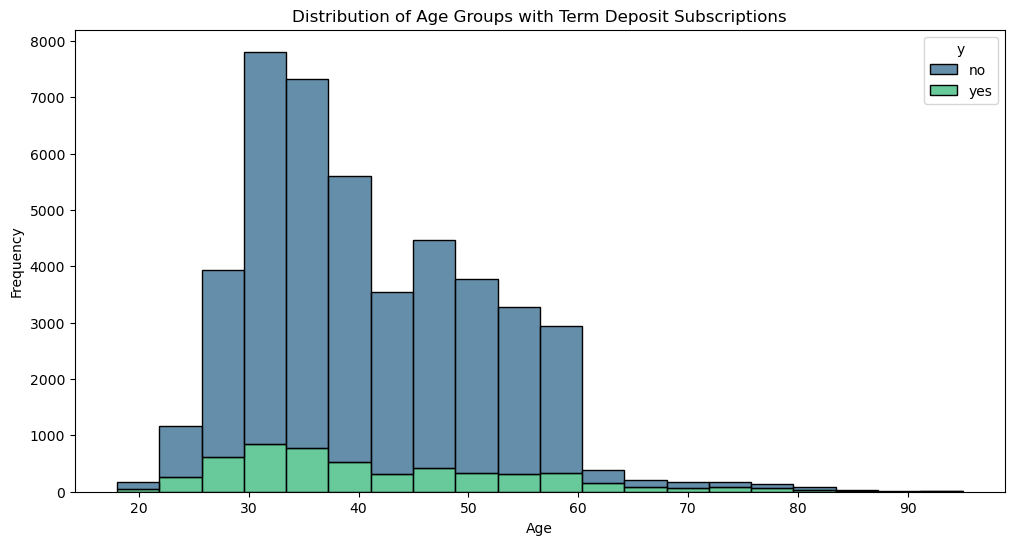

In [10]:
# Creating a figure for the histogram
plt.figure(figsize=(12, 6))

#'multiple="stack"' stacks the bars on top of one another;
# 'hue' distinguishes between subscribers and non-subscribers;
# 'age' is created as a stacked histogram, divided by the target variable 'y'.
sns.histplot(data=bank_data, x='age', hue='y', multiple="stack", bins=20, palette="viridis")

# Adding labels and title
plt.title('Distribution of Age Groups with Term Deposit Subscriptions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Below plot indicates which job categories tend to have higher term deposit subscriptions, potentially guiding targeted marketing strategies.

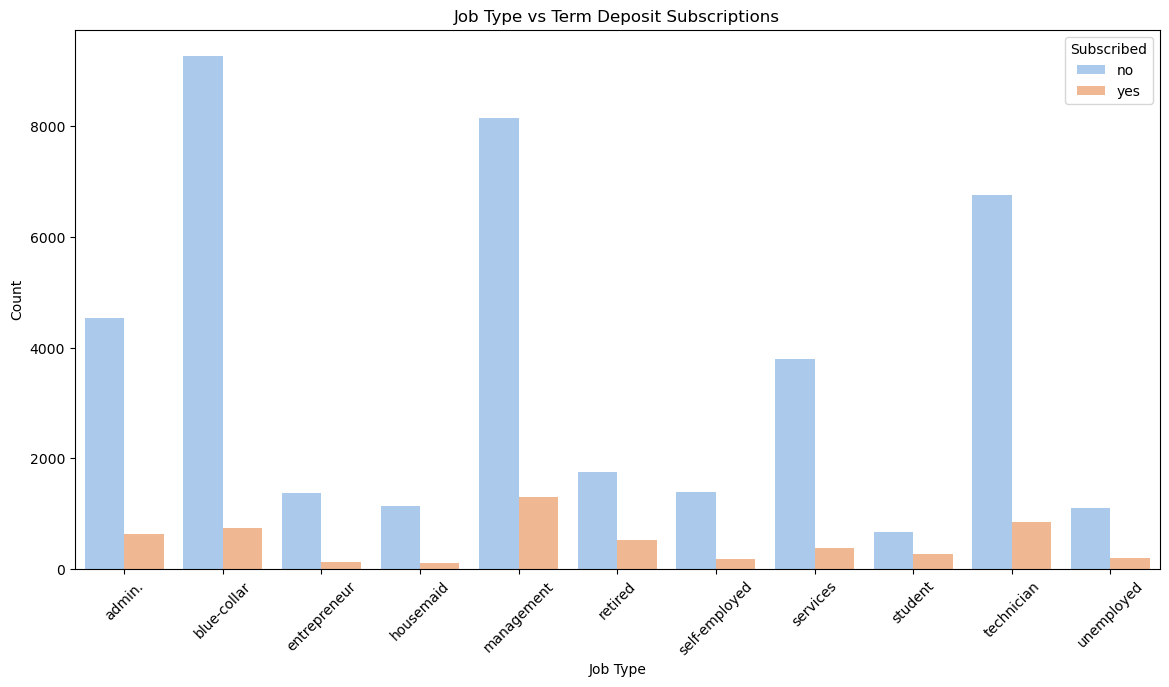

In [11]:
# Creating a figure for the bar plot
plt.figure(figsize=(14, 7))

sns.countplot(data=bank_data, x='job', hue='y', palette='pastel')

# Adding labels, title, and legend
plt.title('Job Type vs Term Deposit Subscriptions')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-labels for better readability
plt.legend(title='Subscribed', loc='upper right')
plt.show()

#### Below function is to create a function to display Categorical features proportions

In [12]:
def counts_plot(y_var, col="w", ax=None):
    y_var_counts = (
        bank_data.loc[:, y_var]
        .value_counts()
        .reset_index()
        .rename(columns={"index": y_var, y_var: "counts"})
        .assign(
            percent=lambda df_: (df_["counts"] / df_["counts"].sum()).round(2) * 100
        )
    )
    sns.set_context("paper")
    ax0 = sns.barplot(
        data=y_var_counts,
        x="percent",
        y=y_var,
        color=col,
        ax=ax,
        order=y_var_counts[y_var],
    )
    values1 = ax0.containers[0].datavalues
    labels = ["{:g}%".format(val) for val in values1]
    ax0.bar_label(ax0.containers[0], labels=labels, fontsize=9, color="#740405")
    ax0.set_ylabel("")
    ax0.set_xlabel("Percent", fontsize=10)
    ax0.set_title(str.title(y_var) + " | proportions ", fontsize=10)
    return

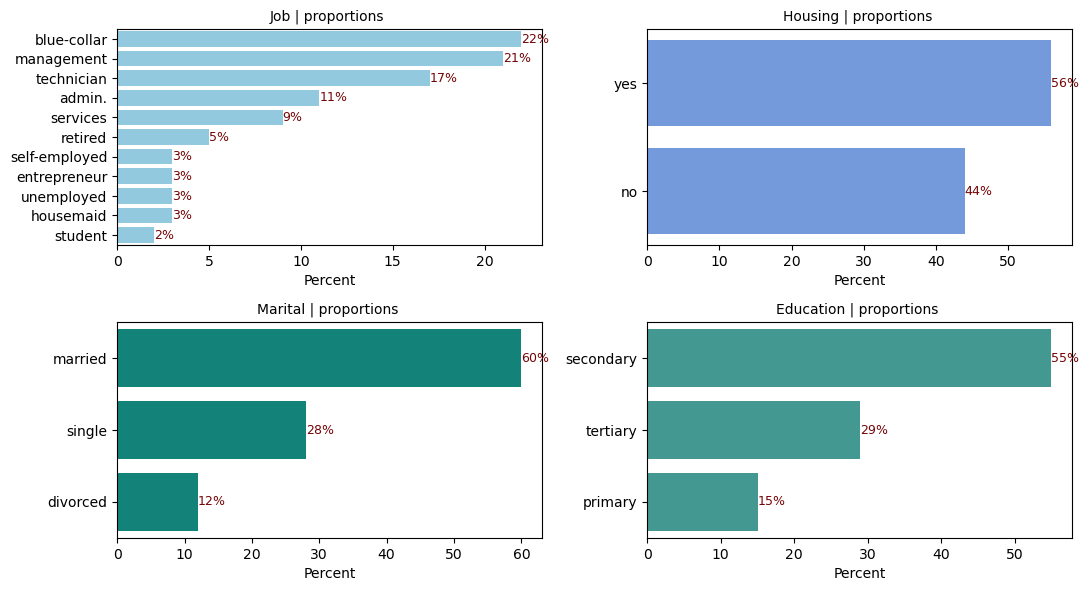

In [13]:
#Job, Housing, Marital and Education Distributions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 6))
counts_plot("job", ax=ax1, col="#87CEEB")
counts_plot("housing", ax=ax2, col="#6495ED")
counts_plot("marital", ax=ax3, col="#009688")
counts_plot("education", ax=ax4, col="#35a79c")
fig.tight_layout()
plt.show()

### 2.4 Tranform the data

In [14]:
bank_data['balance_flag'] = bank_data['balance'].apply(lambda x: 1 if x > 1000 else 0)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_flag
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,1
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,1
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no,0


In [15]:
bank_data['job_group'] = bank_data['job'].apply(lambda x: 0 if x in ['management', 'entrepreneur', 'student', 'admin'] else (1))
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_flag,job_group
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,1,1
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes,1,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no,0,1


In [16]:
bank_data['duration_group'] = bank_data['duration'].apply(lambda x: 0 if x <= 200 else (1 if x <= 500 else 2))
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_flag,job_group,duration_group
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,1,0,1
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,0,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,1,1,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes,0,1,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes,1,1,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1,1,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no,0,1,2


In [17]:
bank_data['age_group'] = bank_data['age'].apply(lambda x: 0 if x < 27 else (1 if x <= 52 else 2))
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balance_flag,job_group,duration_group,age_group
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,261,1,-1,0,failure,no,1,0,1,2
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,151,1,-1,0,failure,no,0,1,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,76,1,-1,0,failure,no,0,0,0,1
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,92,1,-1,0,failure,no,1,1,0,1
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,198,1,-1,0,failure,no,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,failure,yes,0,1,2,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,failure,yes,1,1,1,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,yes,1,1,2,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,failure,no,0,1,2,2


In [18]:
cols_to_category_1 = [
    "balance_flag",
    "job_group",
    "duration_group",
    "age_group"
    
]
bank_data[cols_to_category_1] = bank_data[cols_to_category_1].astype("category")
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45211 non-null  int64   
 1   job             45211 non-null  category
 2   marital         45211 non-null  category
 3   education       45211 non-null  category
 4   default         45211 non-null  category
 5   balance         45211 non-null  int64   
 6   housing         45211 non-null  category
 7   loan            45211 non-null  category
 8   contact         45211 non-null  category
 9   day             45211 non-null  category
 10  month           45211 non-null  category
 11  duration        45211 non-null  int64   
 12  campaign        45211 non-null  int64   
 13  pdays           45211 non-null  int64   
 14  previous        45211 non-null  int64   
 15  poutcome        45211 non-null  category
 16  y               45211 non-null  object  
 17  balance_flag

In [19]:
# List of columns to be one-hot encoded
columns_to_encode = ['marital', 'housing', 'education','loan', 'balance_flag', 'age_group', 'duration_group', 'job_group']

# One-hot encode the specified columns
bank_data_encoded = pd.get_dummies(bank_data, columns=columns_to_encode)

# Display the first few rows of the dataframe to verify the new columns
bank_data_encoded.head()

,age,job,default,balance,contact,day,month,duration,campaign,pdays,...,balance_flag_0,balance_flag_1,age_group_0,age_group_1,age_group_2,duration_group_0,duration_group_1,duration_group_2,job_group_0,job_group_1
0,58,management,no,2143,cellular,5,may,261,1,-1,...,0,1,0,0,1,0,1,0,1,0
1,44,technician,no,29,cellular,5,may,151,1,-1,...,1,0,0,1,0,1,0,0,0,1
2,33,entrepreneur,no,2,cellular,5,may,76,1,-1,...,1,0,0,1,0,1,0,0,1,0
3,47,blue-collar,no,1506,cellular,5,may,92,1,-1,...,0,1,0,1,0,1,0,0,0,1
4,33,blue-collar,no,1,cellular,5,may,198,1,-1,...,1,0,0,1,0,1,0,0,0,1


In [20]:
# To get numerical columns from the data
numerical_columns = bank_data.select_dtypes(include = np.number).columns
numerical_columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

#### Below plots shows the distribution of numerical columns

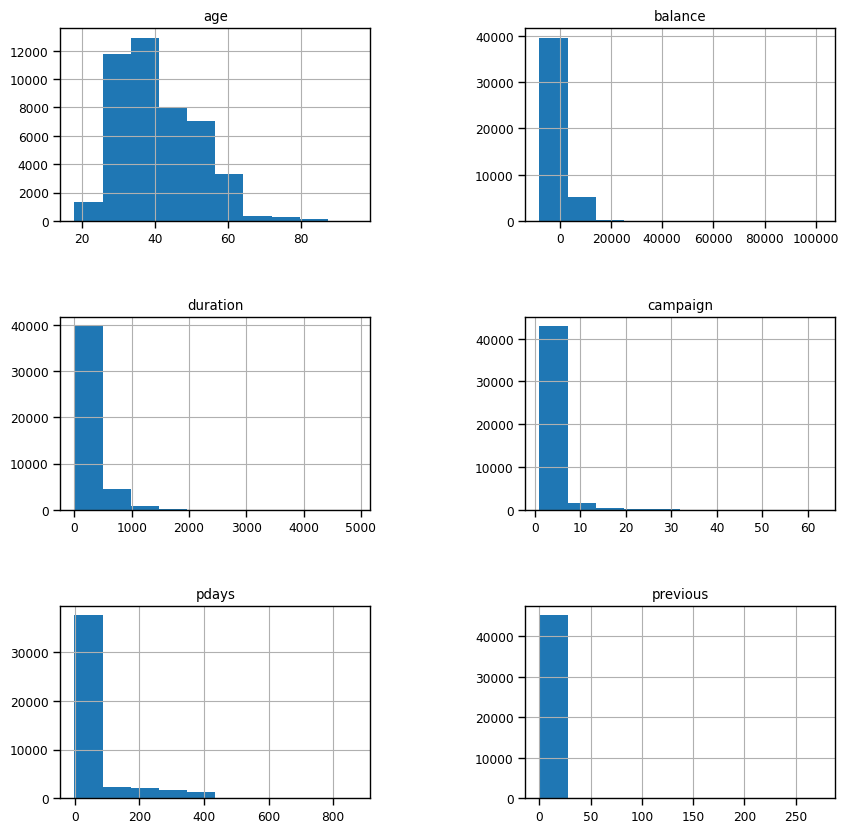

In [21]:
header = ['age', 'balance', 'duration', 'campaign','pdays','previous']
bank_data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

#### Scaling has been done to balance the impact of all variables on the distance calculation and to improve the performance of the algorithm

In [22]:
# To standardize the numerical columns
ss = StandardScaler()
ss.fit(bank_data[numerical_columns])
bank_data[numerical_columns] = ss.transform(bank_data[numerical_columns])
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balance_flag,job_group,duration_group,age_group
0,1.606965,management,married,tertiary,no,0.256419,yes,no,cellular,5,...,0.011016,-0.569351,-0.411453,-0.251940,failure,no,1,0,1,2
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,cellular,5,...,-0.416127,-0.569351,-0.411453,-0.251940,failure,no,0,1,0,1
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,cellular,5,...,-0.707361,-0.569351,-0.411453,-0.251940,failure,no,0,0,0,1
3,0.571051,blue-collar,married,secondary,no,0.047205,yes,no,cellular,5,...,-0.645231,-0.569351,-0.411453,-0.251940,failure,no,1,1,0,1
4,-0.747384,blue-collar,single,secondary,no,-0.447091,no,no,cellular,5,...,-0.233620,-0.569351,-0.411453,-0.251940,failure,no,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,technician,married,tertiary,no,-0.176460,no,no,cellular,17,...,2.791329,0.076230,-0.411453,-0.251940,failure,yes,0,1,2,1
45207,2.831227,retired,divorced,primary,no,0.120447,no,no,cellular,17,...,0.768224,-0.246560,-0.411453,-0.251940,failure,yes,1,1,1,2
45208,2.925401,retired,married,secondary,no,1.429593,no,no,cellular,17,...,3.373797,0.721811,1.436189,1.050473,success,yes,1,1,2,2
45209,1.512791,blue-collar,married,secondary,no,-0.228024,no,no,telephone,17,...,0.970146,0.399020,-0.411453,-0.251940,failure,no,0,1,2,2


#### OrdinalEncoder is used to convert categorical values into numerical codes so that they can be used in model fitting

In [23]:
# Identifying columns in 'bank_data' that are of the type 'category'.
categorical_columns = bank_data.select_dtypes('category').columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day', 'month', 'poutcome', 'balance_flag', 'job_group',
       'duration_group', 'age_group'],
      dtype='object')

In [24]:
enc = OrdinalEncoder()
# Transforming categorical columns in 'bank_data' to ordinal numbers for model compatibility.
bank_data[categorical_columns] = enc.fit_transform(bank_data[categorical_columns])
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balance_flag,job_group,duration_group,age_group
0,1.606965,4.0,1.0,2.0,0.0,0.256419,1.0,0.0,0.0,4.0,...,0.011016,-0.569351,-0.411453,-0.251940,0.0,no,1.0,0.0,1.0,2.0
1,0.288529,9.0,2.0,1.0,0.0,-0.437895,1.0,0.0,0.0,4.0,...,-0.416127,-0.569351,-0.411453,-0.251940,0.0,no,0.0,1.0,0.0,1.0
2,-0.747384,2.0,1.0,1.0,0.0,-0.446762,1.0,1.0,0.0,4.0,...,-0.707361,-0.569351,-0.411453,-0.251940,0.0,no,0.0,0.0,0.0,1.0
3,0.571051,1.0,1.0,1.0,0.0,0.047205,1.0,0.0,0.0,4.0,...,-0.645231,-0.569351,-0.411453,-0.251940,0.0,no,1.0,1.0,0.0,1.0
4,-0.747384,1.0,2.0,1.0,0.0,-0.447091,0.0,0.0,0.0,4.0,...,-0.233620,-0.569351,-0.411453,-0.251940,0.0,no,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,9.0,1.0,2.0,0.0,-0.176460,0.0,0.0,0.0,16.0,...,2.791329,0.076230,-0.411453,-0.251940,0.0,yes,0.0,1.0,2.0,1.0
45207,2.831227,5.0,0.0,0.0,0.0,0.120447,0.0,0.0,0.0,16.0,...,0.768224,-0.246560,-0.411453,-0.251940,0.0,yes,1.0,1.0,1.0,2.0
45208,2.925401,5.0,1.0,1.0,0.0,1.429593,0.0,0.0,0.0,16.0,...,3.373797,0.721811,1.436189,1.050473,2.0,yes,1.0,1.0,2.0,2.0
45209,1.512791,1.0,1.0,1.0,0.0,-0.228024,0.0,0.0,1.0,16.0,...,0.970146,0.399020,-0.411453,-0.251940,0.0,no,0.0,1.0,2.0,2.0


In [25]:
# Converting the numpy array to pandas dataframe
bank_data = pd.DataFrame(bank_data)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balance_flag,job_group,duration_group,age_group
0,1.606965,4.0,1.0,2.0,0.0,0.256419,1.0,0.0,0.0,4.0,...,0.011016,-0.569351,-0.411453,-0.251940,0.0,no,1.0,0.0,1.0,2.0
1,0.288529,9.0,2.0,1.0,0.0,-0.437895,1.0,0.0,0.0,4.0,...,-0.416127,-0.569351,-0.411453,-0.251940,0.0,no,0.0,1.0,0.0,1.0
2,-0.747384,2.0,1.0,1.0,0.0,-0.446762,1.0,1.0,0.0,4.0,...,-0.707361,-0.569351,-0.411453,-0.251940,0.0,no,0.0,0.0,0.0,1.0
3,0.571051,1.0,1.0,1.0,0.0,0.047205,1.0,0.0,0.0,4.0,...,-0.645231,-0.569351,-0.411453,-0.251940,0.0,no,1.0,1.0,0.0,1.0
4,-0.747384,1.0,2.0,1.0,0.0,-0.447091,0.0,0.0,0.0,4.0,...,-0.233620,-0.569351,-0.411453,-0.251940,0.0,no,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,9.0,1.0,2.0,0.0,-0.176460,0.0,0.0,0.0,16.0,...,2.791329,0.076230,-0.411453,-0.251940,0.0,yes,0.0,1.0,2.0,1.0
45207,2.831227,5.0,0.0,0.0,0.0,0.120447,0.0,0.0,0.0,16.0,...,0.768224,-0.246560,-0.411453,-0.251940,0.0,yes,1.0,1.0,1.0,2.0
45208,2.925401,5.0,1.0,1.0,0.0,1.429593,0.0,0.0,0.0,16.0,...,3.373797,0.721811,1.436189,1.050473,2.0,yes,1.0,1.0,2.0,2.0
45209,1.512791,1.0,1.0,1.0,0.0,-0.228024,0.0,0.0,1.0,16.0,...,0.970146,0.399020,-0.411453,-0.251940,0.0,no,0.0,1.0,2.0,2.0


In [26]:
# Converting 'yes/no' responses in the 'y' column to 1 & 0 respectively
bank_data['y'] = bank_data['y'].replace('yes', 1)
bank_data['y'] = bank_data['y'].replace('no', 0)

## Step 3: Modelling

## 3.1 Splitting the dataset into train & test datasets

In [27]:
# Making a copy of the original dataset.
bank_data1 = bank_data
# Assigning target and feature columns to y & X variables.
y = bank_data1['y']
X = bank_data1.drop(['y'], axis = 1)

#### Dividing the data into testing and training sets, setting aside 30% of the total for testing. Before splitting, the data is ensured to be randomly shuffled using the'shuffle' function.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.30, shuffle=True)

## 3.2 Decision tree

In [29]:
# To ensure reproducibility, the Decision tree classifier is initialised with a particular random seed.
dtree = DecisionTreeClassifier(random_state=32)
dtree.fit(X_train, y_train) # Training the model on the data (fitting the decision tree).
y_pred = dtree.predict(X_test) # Predicting the outcomes for the test dataset 

In [30]:
# printing metrics
l1 = []
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred))
print('f1 score:\n', f1_score(y_test,y_pred))
print('AUC score:\n', roc_auc_score(y_test,y_pred))

l1.append(accuracy_score(y_test, y_pred))
l1.append(precision_score(y_test, y_pred))
l1.append(recall_score(y_test, y_pred))
l1.append(f1_score(y_test, y_pred))
l1.append(roc_auc_score(y_test, y_pred))
l1

Confusion Matrix:
  [[11078   929]
 [  801   756]]
Accuracy score:
 0.8724565025066352
Precision score:
 0.44866468842729973
Recall score:
 0.48554913294797686
f1 score:
 0.4663787785317705
AUC score:
 0.7040887998378594


[0.8724565025066352,
 0.44866468842729973,
 0.48554913294797686,
 0.4663787785317705,
 0.7040887998378594]

In [31]:
# Presenting a thorough model performance report that includes the F1-score, recall, and precision for every class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12007
           1       0.45      0.49      0.47      1557

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.88      0.87      0.87     13564



### Hyperparameter tuning for Decision tree using Grid Search.

In [32]:
#This grid specifies various options for three different hyperparameters to be used in grid search.
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_leaf_nodes' : [2, 10, 25, 50],
    'min_impurity_decrease' : [0.001]
}
# define GridSearchCV with cv=5
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# find best estimator
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)
l2 = []
print(f"Optimized Decision Tree Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Optimized Decision Tree Precision: {precision_score(y_test, y_pred)*100:.2f}%")
print(f"Optimized Decision Tree Recall: {recall_score(y_test, y_pred)*100:.2f}%")
print(f"Optimized Decision Tree f1: {f1_score(y_test, y_pred)*100:.2f}%")
print(f"Optimized Decision Tree auc: {roc_auc_score(y_test, y_pred)*100:.2f}%")

l2.append(accuracy_score(y_test, y_pred))
l2.append(precision_score(y_test, y_pred))
l2.append(recall_score(y_test, y_pred))
l2.append(f1_score(y_test, y_pred))
l2.append(roc_auc_score(y_test, y_pred))
l2

Optimized Decision Tree Accuracy: 90.09%
Optimized Decision Tree Precision: 61.34%
Optimized Decision Tree Recall: 36.99%
Optimized Decision Tree f1: 46.15%
Optimized Decision Tree auc: 66.99%


[0.9009141846063108,
 0.6134185303514377,
 0.3699421965317919,
 0.4615384615384615,
 0.6698549160388617]

## 3.3 Random Forest

In [33]:
# To ensure reproducibility, the Random Forest classifier is initialised with a particular random seed.
rf = RandomForestClassifier(random_state = 32)
rf.fit(X_train, y_train) # fit the random forest rf
y_pred = rf.predict(X_test) # Predicting the outcomes for the test dataset 

In [34]:
# printing metrics
l3 = []
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred))
print('f1 score:\n', f1_score(y_test, y_pred))
print('AUC score:\n', roc_auc_score(y_test, y_pred))

l3.append(accuracy_score(y_test, y_pred))
l3.append(precision_score(y_test, y_pred))
l3.append(recall_score(y_test, y_pred))
l3.append(f1_score(y_test, y_pred))
l3.append(roc_auc_score(y_test, y_pred))
l3

Confusion Matrix:
  [[11665   342]
 [  923   634]]
Accuracy score:
 0.9067384252432911
Precision score:
 0.6495901639344263
Recall score:
 0.4071933204881182
f1 score:
 0.5005921831819976
AUC score:
 0.6893549678979276


[0.9067384252432911,
 0.6495901639344263,
 0.4071933204881182,
 0.5005921831819976,
 0.6893549678979276]

In [35]:
# Presenting a thorough model performance report that includes the F1-score, recall, and precision for every class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12007
           1       0.65      0.41      0.50      1557

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.72     13564
weighted avg       0.89      0.91      0.90     13564



#### To find the importance of features in predicting the target

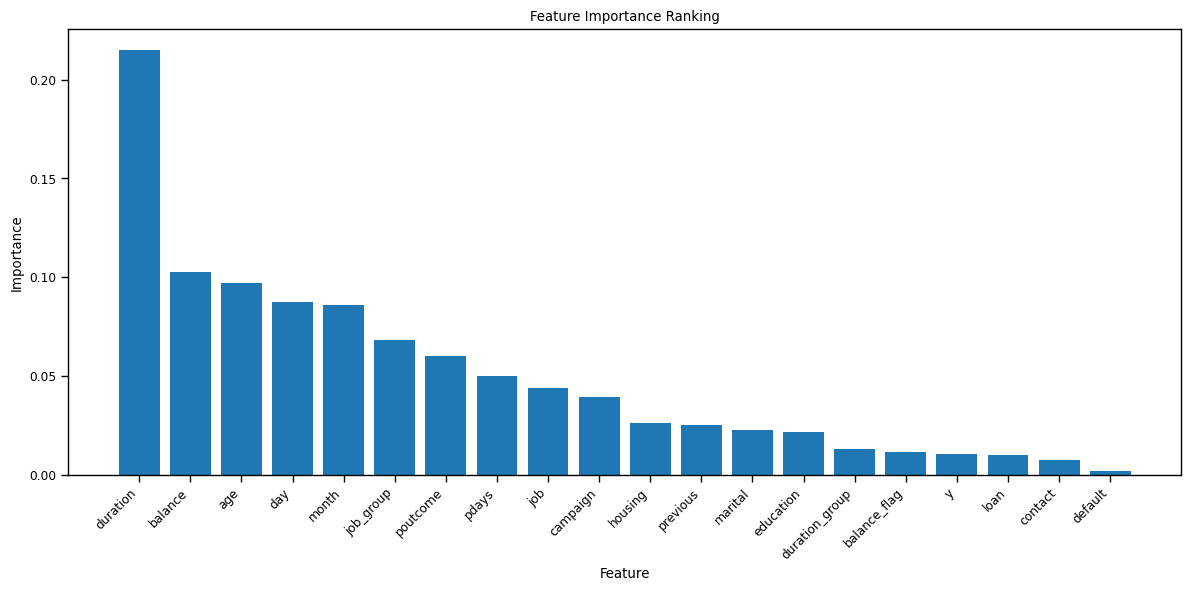

In [36]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = rf.feature_importances_

# Get indices of sort in descending order
indices = np.argsort(importances)[::-1]

# Get the feature names (assuming bank_data is still a DataFrame)
feature_names = bank_data.columns.tolist()

# Create a list of sorted feature names
sorted_feature_names = [feature_names[index] for index in indices]

# Create the plot
plt.figure(figsize=(12, 6))

# Create a bar chart, with feature importances as height, and feature names as labels
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45, ha='right')

# Labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking')

# Show the plot
plt.tight_layout()
plt.show()


## 3.4 XGBoost

In [37]:
# To ensure reproducibility, the XGBoost classifier is initialised with a particular random seed.
xgboost = XGBClassifier(random_state=32)
xgboost.fit(X_train, y_train) # the XGBoost model is trained.
y_pred = xgboost.predict(X_test) # Making predictions on the test data

In [38]:
# printing metrics
l4 = []
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred))
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Precision score:\n', precision_score(y_test, y_pred))
print('Recall score:\n', recall_score(y_test, y_pred))
print('f1 score:\n', f1_score(y_test, y_pred))
print('roc score:\n', roc_auc_score(y_test, y_pred))
l4.append(accuracy_score(y_test, y_pred))
l4.append(precision_score(y_test, y_pred))
l4.append(recall_score(y_test, y_pred))
l4.append(f1_score(y_test, y_pred))
l4.append(roc_auc_score(y_test, y_pred))
l4

Confusion Matrix:
  [[11562   445]
 [  834   723]]
Accuracy score:
 0.9057062813329402
Precision score:
 0.6190068493150684
Recall score:
 0.464354527938343
f1 score:
 0.5306422018348623
roc score:
 0.7136464069690882


[0.9057062813329402,
 0.6190068493150684,
 0.464354527938343,
 0.5306422018348623,
 0.7136464069690882]

In [39]:
# Presenting a thorough model performance report that includes the F1-score, recall, and precision for every class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12007
           1       0.62      0.46      0.53      1557

    accuracy                           0.91     13564
   macro avg       0.78      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564



## 3.5 Comparison of Metrics from All Models

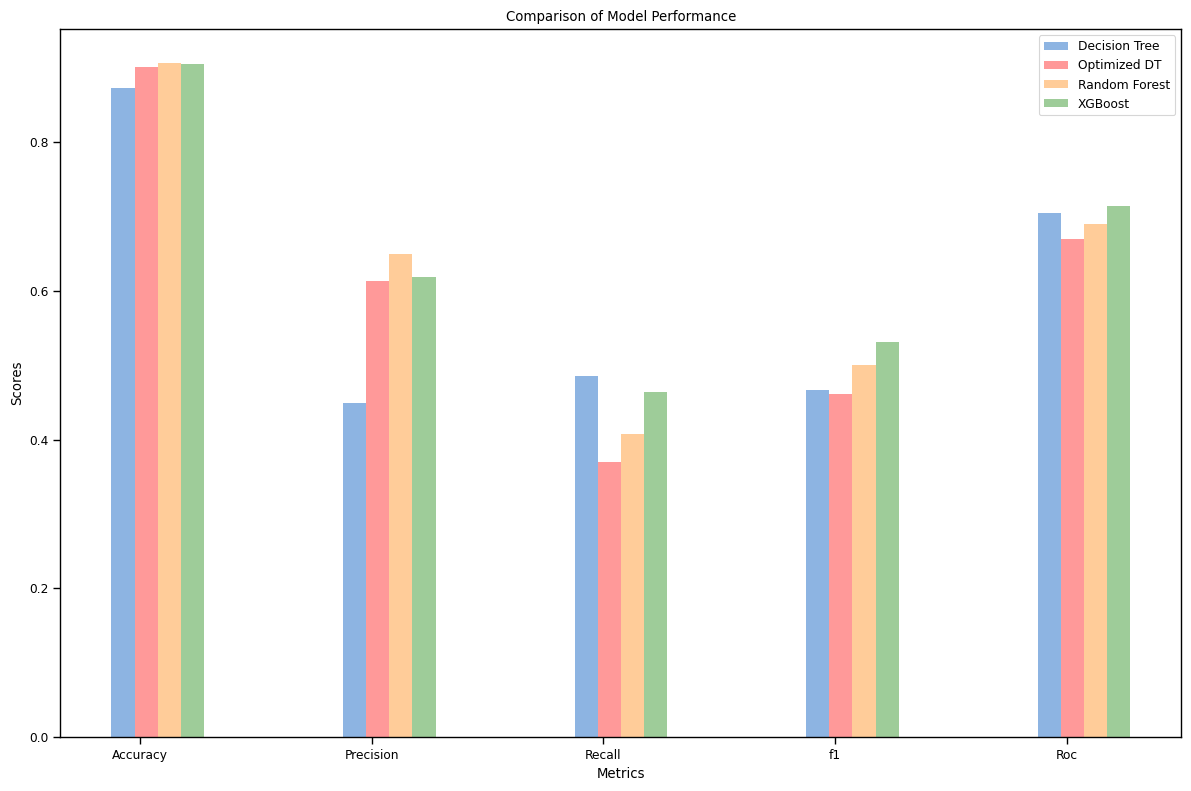

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data: scores for each model
decision_tree = l1  # [accuracy, precision, recall]
optimized_dt = l2
random_forest = l3
xgboost = l4

# Metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'f1', 'Roc']
models = ['Decision Tree', 'Optimized DT', 'Random Forest', 'XGBoost']
scores = np.array([decision_tree, optimized_dt, random_forest, xgboost])  # convert list to numpy array for manipulation

# Number of groups and bar width
num_metrics = len(metrics)
bar_width = 0.1  # Make bars thinner

# Colors (lighter shades)
colors = ['#8DB4E2', '#FF9999', '#FFCC99', '#9ECC99']  # You can use any HEX color codes

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Set positions for each bar
indices = np.arange(num_metrics)

# Create bars for each model with lighter colors
for i, (model, score, color) in enumerate(zip(models, scores, colors)):
    ax.bar(indices + i * bar_width, score, bar_width, label=model, color=color)

# Adjust axes and layout settings
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(indices + 1.5 * bar_width / 2)  # Centering the label under the group of bars
ax.set_xticklabels(metrics)
ax.legend()

# Show plot with a tight layout
plt.tight_layout()
plt.show()

## 4. Recommendations 

#### To see which columns affect the accuracy of the models

In [41]:
# Considered the dataframe created after one hot encoding is done
bank_data_encoded.info()
bank_data_encoded['y'] = bank_data_encoded['y'].replace('yes', 1)
bank_data_encoded['y'] = bank_data_encoded['y'].replace('no', 0)
bank_data_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  int64   
 1   job                  45211 non-null  category
 2   default              45211 non-null  category
 3   balance              45211 non-null  int64   
 4   contact              45211 non-null  category
 5   day                  45211 non-null  category
 6   month                45211 non-null  category
 7   duration             45211 non-null  int64   
 8   campaign             45211 non-null  int64   
 9   pdays                45211 non-null  int64   
 10  previous             45211 non-null  int64   
 11  poutcome             45211 non-null  category
 12  y                    45211 non-null  object  
 13  marital_divorced     45211 non-null  uint8   
 14  marital_married      45211 non-null  uint8   
 15  marital_single     

,age,job,default,balance,contact,day,month,duration,campaign,pdays,...,balance_flag_0,balance_flag_1,age_group_0,age_group_1,age_group_2,duration_group_0,duration_group_1,duration_group_2,job_group_0,job_group_1
0,58,management,no,2143,cellular,5,may,261,1,-1,...,0,1,0,0,1,0,1,0,1,0
1,44,technician,no,29,cellular,5,may,151,1,-1,...,1,0,0,1,0,1,0,0,0,1
2,33,entrepreneur,no,2,cellular,5,may,76,1,-1,...,1,0,0,1,0,1,0,0,1,0
3,47,blue-collar,no,1506,cellular,5,may,92,1,-1,...,0,1,0,1,0,1,0,0,0,1
4,33,blue-collar,no,1,cellular,5,may,198,1,-1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,no,825,cellular,17,nov,977,3,-1,...,1,0,0,1,0,0,0,1,0,1
45207,71,retired,no,1729,cellular,17,nov,456,2,-1,...,0,1,0,0,1,0,1,0,0,1
45208,72,retired,no,5715,cellular,17,nov,1127,5,184,...,0,1,0,0,1,0,0,1,0,1
45209,57,blue-collar,no,668,telephone,17,nov,508,4,-1,...,1,0,0,0,1,0,0,1,0,1


#### Considered columns created using one hot encoding to see which categories are mostly contributing to the subscription of fixed deposit

In [42]:
bank_data_new = bank_data_encoded
y = bank_data_encoded['y']
X = bank_data_encoded[[ 'marital_married', 
                       'education_primary', 
                       'education_secondary', 
                       'job_group_1', 
                       'housing_yes', 
                       'loan_no',
                       'balance_flag_1',  
                       'age_group_1',
                       'duration_group_1', 
                       'duration_group_2'
               ]]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.30, shuffle=True)

#### Random forest model has been used to find the accuracy and precision by using some of the feature columns created by using one hot encoding

In [44]:
model = RandomForestClassifier(random_state = 32)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8854320259510469
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12007
           1       0.50      0.16      0.24      1557

    accuracy                           0.89     13564
   macro avg       0.70      0.57      0.59     13564
weighted avg       0.85      0.89      0.86     13564



#### Based on the above results (from step 4), we can say that the considered features are mostly contributing to the accuracy of the model.<br> We can recommend that if a person has age in between 27 & 52, is married, has primary/secondary education, under the job group 1, has housing loan, has no personal loan, maintains atleast 1000 balance in their account is more likely to subscribe to the fixed deposits. Bank should target the customers who has the above stated features to get more subscriptions.